# Learning - Review of demo notebook

Date: 20 June 2022

### 1. What is xgcm? It was not installed on my server, probably need to include pip install xgcm and import xgcm command..

xgcm is a python packge for working with the datasets produced by numerical General Circulation Models (GCMs) and similar gridded datasets that are amenable to finite volume analysis. In these datasets, different variables are located at different positions with respect to a volume or area element (e.g. cell center, cell face, etc.) xgcm solves the problem of how to interpolate and difference these variables from one position to another.

Reference: https://xgcm.readthedocs.io/en/latest/
https://xgcm.readthedocs.io/en/latest/grids.html

This package is probably required for ??

### 2. ModuleNotFoundError: No module named 'osse_tools', How to add own written module?

Import local module in jupyter notebook using https://stackoverflow.com/questions/50044615/import-local-module-in-jupyter-notebook

### 3. Things to know about the Data:

Useful Links

1. https://podaac-tools.jpl.nasa.gov/drive/files/misc/web/misc/SWOT/Pre-SWOT_LLC4320/preswot_llc4320_user_guide.pdf
    

## Pre SWOT numerical simulation download tutorial

Trying out the code written as a part o POODAC tutorial : 

https://github.com/podaac/tutorials/blob/master/notebooks/Pre-SWOT_Numerical_Simulation_Demo.ipynb

In [6]:
# didn't have s3fs installed
pip install s3fs

SyntaxError: invalid syntax (1621296131.py, line 2)

### Q. What is s3fs library used for?
S3FS is a PyFilesystem interface to Amazon S3 cloud storage.<br> https://fs-s3fs.readthedocs.io/en/latest/

In [27]:
import s3fs
import requests
import xarray as xr
import pylab as plt
from netrc import netrc
from urllib import request
from platform import system
from getpass import getpass
from http.cookiejar import CookieJar
from os.path import expanduser, join

In [28]:
def setup_earthdata_login_auth(endpoint: str='urs.earthdata.nasa.gov'):
    netrc_name = "_netrc" if system()=="Windows" else ".netrc"
    try:
        username, _, password = netrc(file=join(expanduser('~'), netrc_name)).authenticators(endpoint)
    except (FileNotFoundError, TypeError):
        print('Please provide your Earthdata Login credentials for access.')
        print('Your info will only be passed to %s and will not be exposed in Jupyter.' % (endpoint))
        username = input('Username: ')
        password = getpass('Password: ')
    manager = request.HTTPPasswordMgrWithDefaultRealm()
    manager.add_password(None, endpoint, username, password)
    auth = request.HTTPBasicAuthHandler(manager)
    jar = CookieJar()
    processor = request.HTTPCookieProcessor(jar)
    opener = request.build_opener(auth, processor)
    request.install_opener(opener)

In [33]:
setup_earthdata_login_auth()

Please provide your Earthdata Login credentials for access.
Your info will only be passed to urs.earthdata.nasa.gov and will not be exposed in Jupyter.
Username: manjareeb
Password: ········


In [34]:
ShortName = "MITgcm_LLC4320_Pre-SWOT_JPL_L4_ACC_SMST_v1.0"
target_file = "LLC4320_pre-SWOT_ACC_SMST_20120112.nc"

In [35]:
https_access = f"https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/{ShortName}/{target_file}"

print(https_access)

https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MITgcm_LLC4320_Pre-SWOT_JPL_L4_ACC_SMST_v1.0/LLC4320_pre-SWOT_ACC_SMST_20120112.nc


In [ ]:
def begin_s3_direct_access():
    """Returns s3fs object for accessing datasets stored in S3."""
    response = requests.get("https://archive.podaac.earthdata.nasa.gov/s3credentials").json()
    return s3fs.S3FileSystem(key=response['accessKeyId'],
                             secret=response['secretAccessKey'],
                             token=response['sessionToken'], 
                             client_kwargs={'region_name':'us-west-2'})

try:
    fs = begin_s3_direct_access()
    # Load netCDF with 's3fs' and 'xarray' upon successful connection to S3:
    dd = xr.open_dataset(fs.open(f"podaac-ops-cumulus-protected/{ShortName}/{target_file}"))
except:
    print("Failed to establish AWS in-region access. Downloading to local disk instead.")
    request.urlretrieve(https_access, target_file)
    # Load netCDF with 'xarray' after download completes:
    
    dd = xr.open_dataset(target_file)

print(dd)

Failed to establish AWS in-region access. Downloading to local disk instead.


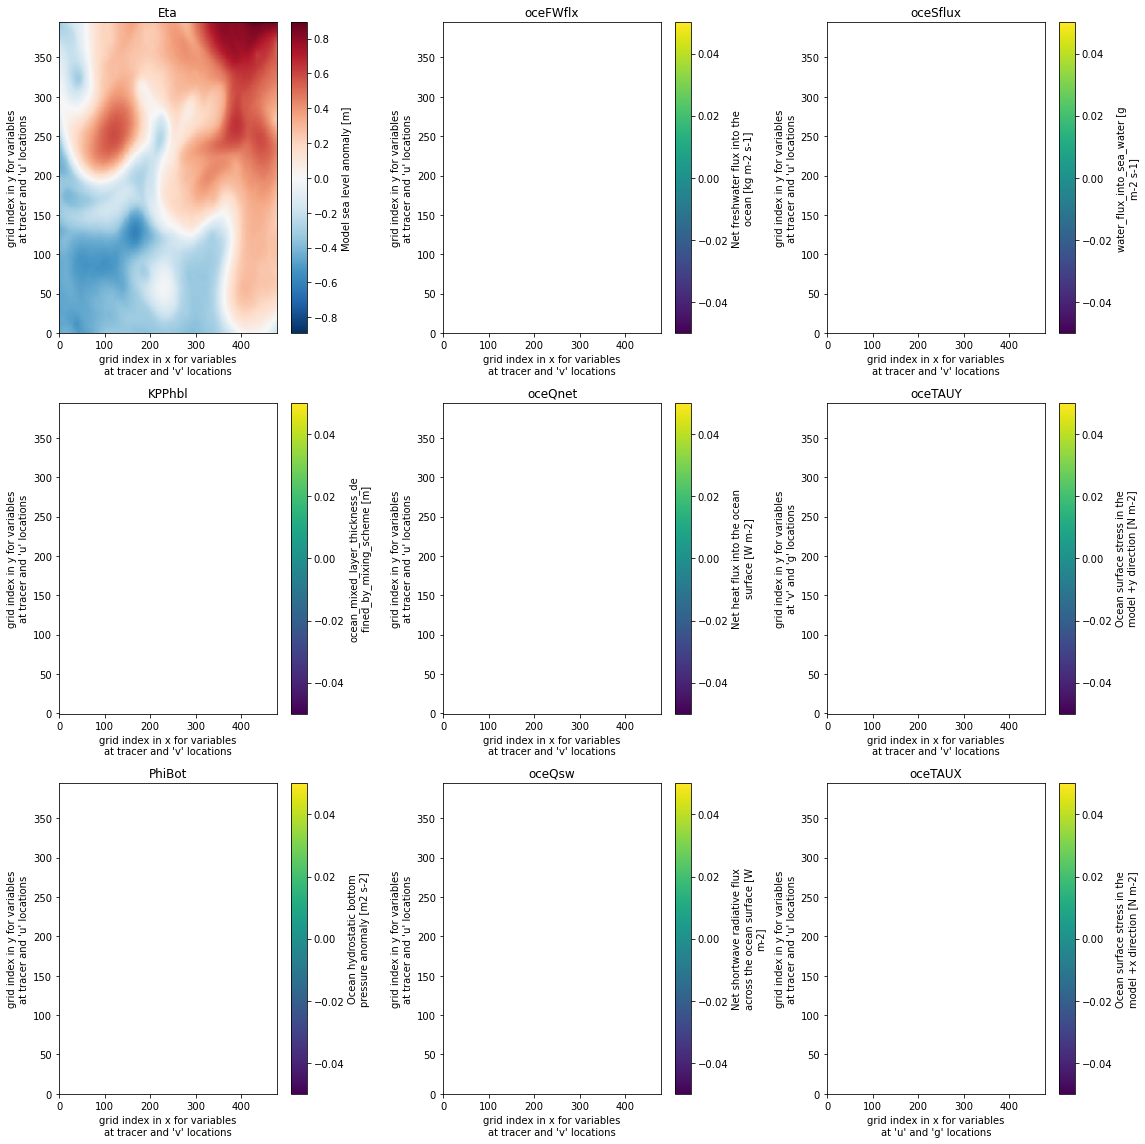

In [50]:
fig,ax=plt.subplots(3,3,figsize=(16,16))

varn=['Eta','KPPhbl','PhiBot','oceFWflx','oceQnet','oceQsw','oceSflux','oceTAUY','oceTAUX']

for i in range(3):
    for j in range(3):
        dd[varn[i*3+j]][0,...].plot(ax=ax[j,i])
        ax[j,i].set_title(varn[i*3+j])
plt.tight_layout()

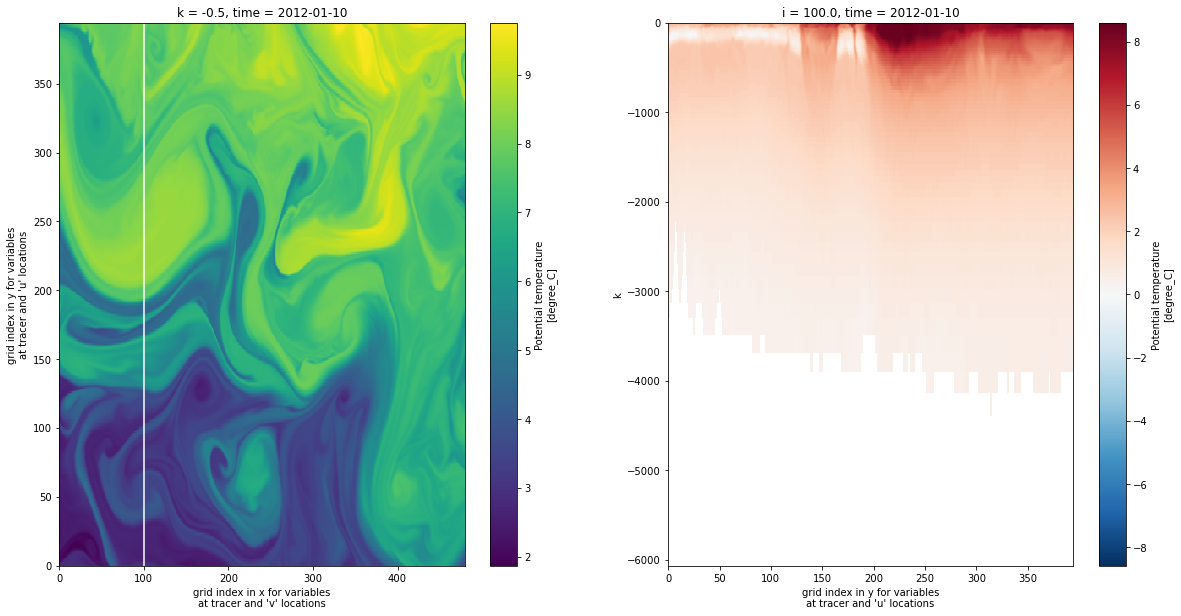

In [51]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
theta=dd['Theta'][:]
theta.coords['k']=dd['Z'].data

theta[0,0,...].plot(ax=ax[0])
ax[0].vlines(100,0,400,colors='w')
theta[0,:,:,100].plot(ax=ax[1])